In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/use_case_data_science/

/content/drive/MyDrive/use_case_data_science


###Step 1: Import Necessary Libraries

In [3]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# warning library
import warnings
warnings.filterwarnings("ignore")

###Step 2: Load Data

In [4]:
data_frame = pd.read_csv('./hcvdat0.csv')

###Step 3: Summarize Data

In [5]:
data_frame.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
data_frame.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [7]:
data_frame = data_frame.drop(labels ="Unnamed: 0", axis=1)

In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


> We can see that Category and Sex column holds categorical data and all other variables have numerical values

> Columns ALB, ALP, ALT, CHOL, and PROT have few records missing, now we can either fill those records or drop those rows having missing data. But we can not fill assumed values for medical data so lets drop them.

In [9]:
data_frame = data_frame.dropna()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    object 
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 64.4+ KB


In [10]:
data_frame["Category"].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [11]:
# Though there are many categories, we are breaking it into binary: healthy and unhealthy.
data_frame['Category'].loc[data_frame['Category'].isin(["1=Hepatitis","2=Fibrosis", "3=Cirrhosis"])] = 1 #unhealty
data_frame['Category'].loc[data_frame['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 0 #healty
data_frame = data_frame.astype({'Category': 'int'})

In [12]:
data_frame["Category"].value_counts()

0    533
1     56
Name: Category, dtype: int64

it means there are 533 healthy people and 56 unhealty

In [13]:
data_frame.groupby(["Sex", "Category"]).size()

Sex  Category
f    0           210
     1            16
m    0           323
     1            40
dtype: int64

There are 210 healthy and 16 unhealthy females, while 323 healthy and 40 unhealthy males

In [14]:
# Statical attributes of dataset
data_frame.describe()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.095076,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,0.293570,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,0.000000,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,0.000000,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,0.000000,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,1.000000,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


### Step 4: Exploratory Data Analysis 



> Firstly, we should look at correlation between features.


> We can see the negative and positive correlation between features. Negative correlation means that they have inverse proportion, positive correlation means direct proportion


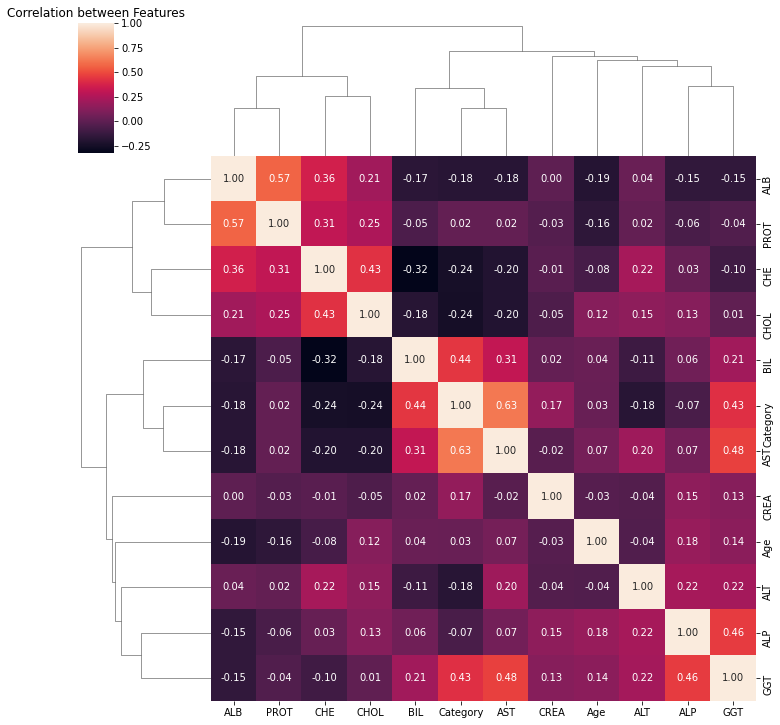

In [15]:
# EDA (Exploratory Data Analysis)

corr_matrix = data_frame.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f" )
plt.title("Correlation between Features")
plt.show()

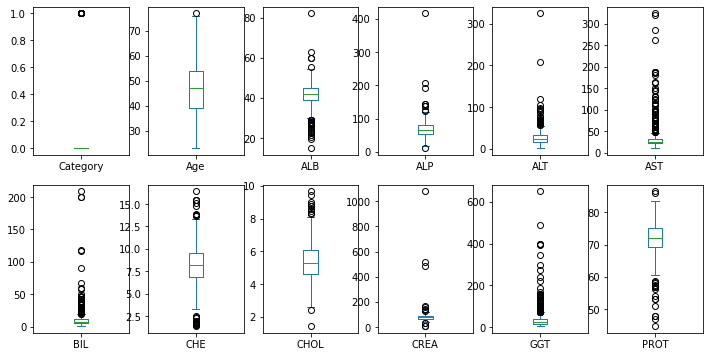

In [16]:
# Box and whisker plot
data_frame.plot(kind="box", subplots = True, layout=(2,6), figsize=(12,6))
plt.show()

We can see that there are lot of outliers in most of the input variables, but we are not going to do anything about them beacause:

we are not into medical field and we do not have enough knowledege abot most of the features and what they represent.
Blood analysis values for each feature can differ hugely between healthy and unhealthy individual and the outliers in this Data Frame may contain some important information for the models to come in order to predict the disease.

This dataset is very small, only 589 records are there, That is very few and most of them refer to healthy people so we exploit each and every single one of them.

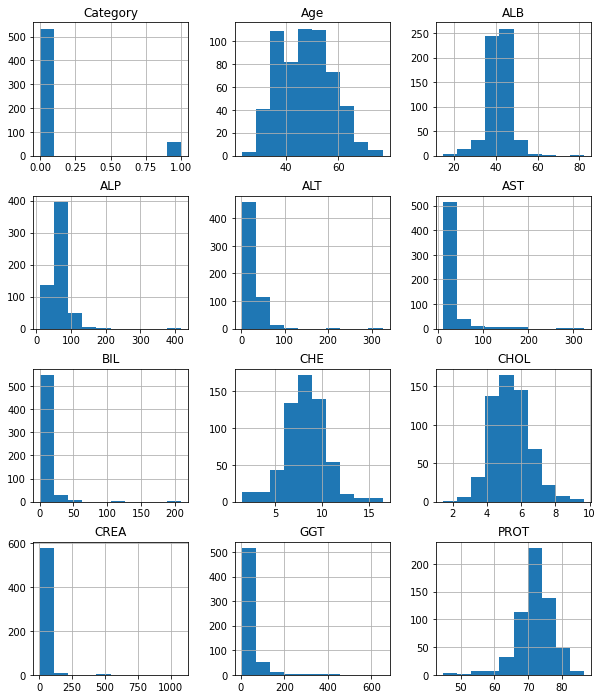

In [17]:
#Histogram
data_frame.hist(layout=(4,3), figsize=(10,12))
plt.show()

We can see that few variables are following nearly normal distribution

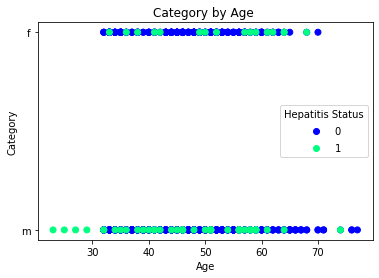

In [18]:
# Plot category against age , group by sex
x = data_frame['Age']
y = data_frame["Category"]
scatter = plt.scatter(x, data_frame["Sex"], c=y, cmap='winter')
plt.title('Category by Age ')
plt.xlabel('Age')
plt.ylabel('Category')
plt.legend(*scatter.legend_elements(), title='Hepatitis Status')
plt.show()

By above graph be can see that all males below the age 30 are positive. The model used will likely put too much weight on this coincidence due to such strong correlation. But we are not droping males below the age 30 because we have very less records.

In [19]:
data_frame['Sex'].loc[data_frame['Sex']=='m']=1
data_frame['Sex'].loc[data_frame['Sex']=='f']=0
data_frame = data_frame.astype({'Sex': 'int'})

In [20]:
data_frame["Sex"].value_counts()

1    363
0    226
Name: Sex, dtype: int64

###Step 5: Define Input and Output variable

In [21]:
# input variable
X = data_frame.drop(labels="Category", axis=1)

# Output variable
y = data_frame["Category"]

###Step 6: Split into training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Normalization
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


###Step 7: Evaluating different Models

In [24]:
# Create a dictionary for Model parameters

model_param = {'DecisionTreeClassifier':{'model': DecisionTreeClassifier(random_state=0), 'param': {'criterion': ['gini','entropy']}},
              'Randomforest': {'model': RandomForestClassifier(random_state=0), 'param': {'n_estimators':[1,5,10,15,20,25,30,40,50,60,80,100]}},
              'LogisticRegression':{'model': LogisticRegression(solver='liblinear',multi_class='auto', random_state=0),'param': {'C': [1,5,10,15,20]}},
              'GaussianNB':{'model': GaussianNB(), 'param': {}},
              'MultinomialNB':{'model': MultinomialNB(), 'param': {}},
               'SVM':{'model': SVC(gamma='auto', random_state=0), 'param': {'C': [0.001,0.1,1],'kernel':['rbf', 'linear']}}
              }

In [25]:
# Applying GridSearchCV to evaluate models



scores = []

for model_name, mp in model_param.items():
    cl = GridSearchCV(mp['model'], mp['param'], cv=5, return_train_score=None)
    cl.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': cl.best_score_,
        'best_params': cl.best_params_
    })

In [26]:
scores

[{'best_params': {'criterion': 'entropy'},
  'best_score': 0.9796465304939883,
  'model': 'DecisionTreeClassifier'},
 {'best_params': {'n_estimators': 40},
  'best_score': 0.9711429813124728,
  'model': 'Randomforest'},
 {'best_params': {'C': 1},
  'best_score': 0.9812979863827321,
  'model': 'LogisticRegression'},
 {'best_params': {}, 'best_score': 0.9405475880052151, 'model': 'GaussianNB'},
 {'best_params': {},
  'best_score': 0.9609445168767202,
  'model': 'MultinomialNB'},
 {'best_params': {'C': 0.1, 'kernel': 'linear'},
  'best_score': 0.989787049109083,
  'model': 'SVM'}]

In [27]:
# Scores as a dataframe
score_df = pd.DataFrame(scores)
score_df.sort_values(by=['best_score'], inplace = True, ascending=False)
score_df

,model,best_score,best_params
5,SVM,0.989787,"{'C': 0.1, 'kernel': 'linear'}"
2,LogisticRegression,0.981298,{'C': 1}
0,DecisionTreeClassifier,0.979647,{'criterion': 'entropy'}
1,Randomforest,0.971143,{'n_estimators': 40}
4,MultinomialNB,0.960945,{}
3,GaussianNB,0.940548,{}


###Step 8: Applying best model on Training Set

In [28]:
# Apply SVM
model = SVC(C=0.1, kernel='linear')
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

In [29]:
# Confusion matrix to compare results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[108,   0],
       [  2,   8]])

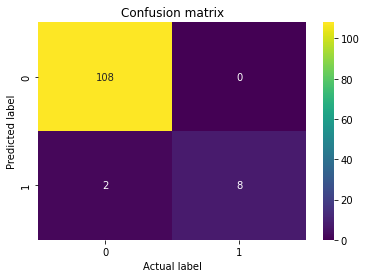

In [30]:
# Plot confusion matrix 
sns.heatmap(cm, annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

We can see that there are 108 True-Negative predictions, 0 False-Negative prediction, 2 False-Positive prediction and 8 True-Positive predictions. it means our model is actually predicting well

In [31]:
#classification accuracy = correct predictions / total predictions * 100
cls_acc = (108+8)/(108+2+0+8)*100
print("Calssification Accuracy:"+str(round(cls_acc,2))+"%")
#error rate = 100- Calssification accuracy
error_rate = 100-cls_acc
print("Error Rate:"+str(round(error_rate,2))+"%")

Calssification Accuracy:98.31%
Error Rate:1.69%


###CONCLUSION

In [78]:
def blood_donor_predict(data, model, scaler):
  test_data = scaler.transform([data])
  pred = model.predict(test_data)
  if pred == 0:
    return print("This person can be blood donor!")
  else:
    return print("This person cannot be a blood donor")

if __name__ == '__main__':
                            #Age Sex	ALB	  ALP	  ALT	  AST	  BIL	  CHE	  CHOL	CREA	  GGT	  PROT
  person_blood_test_result = [32, 1, 38.5,	52.5,	7.7,	22.1,	7.5,	6.93,	3.23,	106.0,	12.1,	69.0]
  blood_donor_predict(person_blood_test_result, model, scaler)

This person can be blood donor!
